In [107]:
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import math

In [108]:
def histogram(im):
    hei, w = im.shape
    h = [0.0] * 256
    for i in range(hei):
        for j in range(w):
            h[im[i, j]]+=1
    h = np.array(h)/(hei*w)
    return h

In [109]:
def median_filter(img, filter_size):
    temp = []
    indexer = filter_size // 2
    height = len(img)
    width = len(img[0])
    smooth_img = []
    smooth_img = np.zeros((height,width))
    for i in range(height):

        for j in range(width):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > height - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > width - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(img[i + z - indexer][j + k - indexer])

            temp.sort()
            smooth_img[i][j] = int(temp[len(temp) // 2])
            temp = []
    return smooth_img

In [110]:
def convolve2D(image, kernel):
    m, n = kernel.shape
    if (m == n):
        h, w = image.shape
        h = h - m + 1
        w = w - m + 1
        new_image = np.zeros((h,w))
        for i in range(h):
            for j in range(w):
                new_image[i][j] = int(np.sum(image[i:i+m, j:j+m]*kernel))
    return new_image

In [111]:
sharpen = np.array([[-1, -1 , 0],
                    [-1, 7, -1],
                    [0, -1, -1]])
unsharp_masking = np.array([[1, 4 , 6, 4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, -476, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1, 4 , 6, 4, 1]])

gaussian_kernel = np.array([[1,  4,  7,  4, 1],
                            [4, 16, 26, 16, 4],
                            [7, 26, 41, 26, 7],
                            [4, 16, 26, 16, 4],
                            [1,  4,  7,  4, 1]])
# gaussian_kernel = np.array([[1,2,1],
#                              [2,4,2],
#                              [1,2,1]])


image = Image.open('./image_(4).jpg')
image = ImageOps.grayscale(image)
image = np.array(image)

filtered_image1 = median_filter(image, 8)

for i in range(8):
    filtered_image1 = convolve2D(filtered_image1, gaussian_kernel)
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()
plt.imshow(filtered_image1, cmap='gray'), plt.axis("off")
plt.show()
to_save = Image.fromarray(filtered_image1).convert("L")
to_save = to_save.save("./result/image_(4).jpg")
# cv2.imwrite("./result/image_(4).jpg", filtered_image)

TypeError: list indices must be integers or slices, not numpy.float64

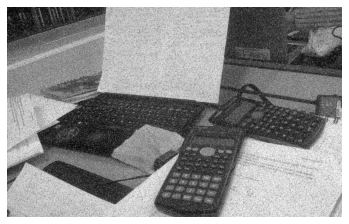

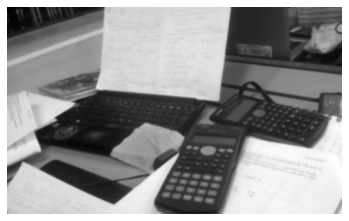

In [ ]:
gaussian_kernel = np.array([[1,  4,  7,  4, 1],
                            [4, 16, 26, 16, 4],
                            [7, 26, 41, 26, 7],
                            [4, 16, 26, 16, 4],
                            [1,  4,  7,  4, 1]])
# gaussian_kernel = np.array([[1,2,1],
#                              [2,4,2],
#                              [1,2,1]])


image = cv2.imread('./image_(3).jpg', cv2.IMREAD_GRAYSCALE)
filtered_image2 = median_filter(image, 8)
for i in range(8):
    filtered_image2 = convolve2D(filtered_image2, gaussian_kernel)
# filtered_image = median_filter(image, 10)
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()
plt.imshow(filtered_image2, cmap='gray'), plt.axis("off")
plt.show()
to_save = Image.fromarray(filtered_image2).convert("L")
to_save = to_save.save("./result/image_(3).jpg")

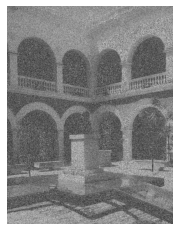

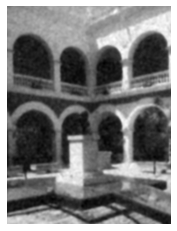

In [ ]:
gaussian_kernel = np.array([[1,  4,  7,  4, 1],
                            [4, 16, 26, 16, 4],
                            [7, 26, 41, 26, 7],
                            [4, 16, 26, 16, 4],
                            [1,  4,  7,  4, 1]])
# gaussian_kernel = np.array([[1,2,1],
#                              [2,4,2],
#                              [1,2,1]])


image = cv2.imread('./image_(2).jpg', cv2.IMREAD_GRAYSCALE)
filtered_image3 = median_filter(image, 15)
for i in range(15):
    filtered_image3 = convolve2D(filtered_image3, gaussian_kernel)
# filtered_image = median_filter(image, 10)
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()
plt.imshow(filtered_image3, cmap='gray'), plt.axis("off")
plt.show()
to_save = Image.fromarray(filtered_image3).convert("L")
to_save = to_save.save("./result/image_(2).jpg")

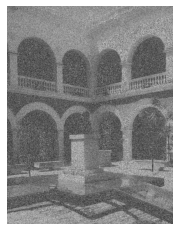

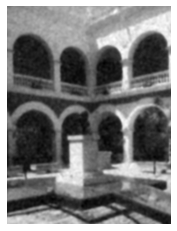

In [ ]:
sharpen = np.array([[-1, -1 , 0],
                    [-1, 7, -1],
                    [0, -1, -1]])

filtered_image = convolve2D(filtered_image3, sharpen)
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()
plt.imshow(filtered_image3, cmap='gray'), plt.axis("off")
plt.show()
to_save = Image.fromarray(filtered_image).convert("L")
to_save = to_save.save("./result/image_(2).jpg")

In [ ]:
def plot_histogram(fig_name, text, result_path, h):
    plt.plot(h)
    plt.title(text) #hist of equalized image
    plt.savefig(result_path+fig_name,bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [ ]:
result_path = "./result/histogram/"
print(filtered_image1)
# h1 = histogram(filtered_image1)
# h2 = histogram(filtered_image2)
# h3 = histogram(filtered_image3)

# plot_histogram("hist_image_(4).jpg", "hist ", result_path, h1)
# plot_histogram("hist_image_(3).jpg", "hist ", result_path, h2)
# plot_histogram("hist_image_(2).jpg", "hist ", result_path, h3)

[[4.05057388e+21 4.05823633e+21 4.06590405e+21 ... 2.96596376e+21
  2.96450464e+21 2.96061563e+21]
 [4.06042802e+21 4.06781012e+21 4.07567372e+21 ... 2.98261680e+21
  2.97721006e+21 2.96852192e+21]
 [4.07124902e+21 4.07789791e+21 4.08550704e+21 ... 3.00235674e+21
  2.99309837e+21 2.97987460e+21]
 ...
 [9.31857258e+20 9.18600571e+20 9.08176162e+20 ... 1.35437953e+21
  1.39352039e+21 1.45844921e+21]
 [9.45193773e+20 9.29559094e+20 9.15972624e+20 ... 1.33596123e+21
  1.37701182e+21 1.44529844e+21]
 [9.55500215e+20 9.37310725e+20 9.20550628e+20 ... 1.32156353e+21
  1.36174568e+21 1.43030235e+21]]
